<a href="https://colab.research.google.com/github/glorivaas/Risk_Measures/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1

### Example risk measures (L/P)
- VaR (value at risk) at the confidence level $c\in(0,1)$
$$ \operatorname{VaR}_c(L) = \inf\{\, v\in\mathbb{R} \colon \mathbb{P}(L > v) \le 1-c \,\} $$
- ES (expected shortfall) at the confidence level $c\in(0,1)$
$$ \operatorname{ES}_c(L) = \mathbb{E}[L \,\vert\, L \ge \operatorname{VaR}_c(L)] $$
- CVaR (conditional VaR) at the confidence level $c\in(0,1)$
$$ \operatorname{CVaR}_c(L) = \frac{1}{1-c} \int_c^1 \operatorname{VaR}_\xi(L) \,d\xi $$

### Exercise 0
Setup your python environment, install numpy, scipy, matplotlib (or other visualization libraries depending on your preferences).

### Exercise 1
Complete the implementation of the following functions.

#Explanation

## 1. Value at Risk (VaR)
#####The **Value at Risk** at confidence level $ c $ definiton is equivalent to:

$$
\operatorname{VaR}_c(X) = \inf \{ v \in \mathbb{R} \mid P(X \leq v) \geq c \}
$$

#####This corresponds to the **quantile function** for level $ 1 - c $.
---

## 2. Expected Shortfall (ES)
#####The **Expected Shortfall (ES)**, is defined as the conditional expectation of losses exceeding **VaR**:

$$
\operatorname{ES}_c(X) = \mathbb{E} [ X \mid X \geq \operatorname{VaR}_c(X) ]
$$

######This measure accounts for the **magnitude of extreme losses** beyond the VaR threshold. For implementation, we will need the inverse of cdf, which we will find using brentq of $cdf(x) - c$ that finds roots of that function.

---

## 3. Conditional Value at Risk (CVaR)
######The **Conditional Value at Risk (CVaR)** is defined as:

$$
\operatorname{CVaR}_c(X) = \frac{1}{1-c} \int_c^1 \operatorname{VaR}_\xi(X) d\xi
$$

######which means that **CVaR is essentially an average of VaR over all confidence levels exceeding** $ c $.



In [21]:
import numpy as np
import numpy.typing as npt
from scipy.stats import norm
import scipy.integrate as spi
from typing import Callable, TypeAlias
import scipy.optimize as opt
import scipy.integrate as integrate
import scipy.misc as spm


def var(cdf: CDFnLike, c: float | NumArr = 0.95) -> float:
    """Computes the Value at Risk (VaR) at confidence level c."""
    return opt.brentq(lambda v: cdf(v) - c, -100, 100)

def es(cdf: CDFnLike, c: float = 0.95) -> float:
    """Computes the Expected Shortfall (ES) at confidence level c."""

    var_c = var(cdf,c)

    pdf = lambda x: spm.derivative(cdf, x, dx=1e-6)

    def integrand(x):
        return x * pdf(x)

    es, _ = integrate.quad(integrand, var_c, np.inf)

    return es / (1 - c)

def cvar(cdf: CDFnLike, c: float = 0.95) -> float:
    integral, _ = spi.quad(lambda xi: var(cdf, xi), c, 1)

    return integral / (1 - c)


### Exercise 2
Check the implementations from task 1 vs. analytical formulas for the uniform distribution on $[0,1]$, $\operatorname{Unif}([0,1])$.


In [22]:
def test_vs_uniform() -> None:
    c = 0.95
    def cdf_unif(x: NumArr) -> NumArr:
        return np.minimum(np.maximum(x, 0.0), 1.0)

    assert np.isclose(var(cdf_unif, c), c)
    assert np.isclose(es(cdf_unif, c), (c + 1) / 2)
    assert np.isclose(cvar(cdf_unif, c), (c + 1) / 2)

test_vs_uniform()

print("All tests passed.")

All tests passed.


<ipython-input-21-8483dcc72bde>:20: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  pdf = lambda x: spm.derivative(cdf, x, dx=1e-6)


### Exercise 3
- For the standard normal distribution $\mathcal{N}(0,1)$, plot the above risk measures against the confidence level $c\in(0,1)$.
- For the normal distribution $\mathcal{N}(0,\sigma)$, plot the above risk measures against $\sigma>0$ for the confidence level $c=95\%$.

Describe the results.

<ipython-input-21-8483dcc72bde>:20: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  pdf = lambda x: spm.derivative(cdf, x, dx=1e-6)


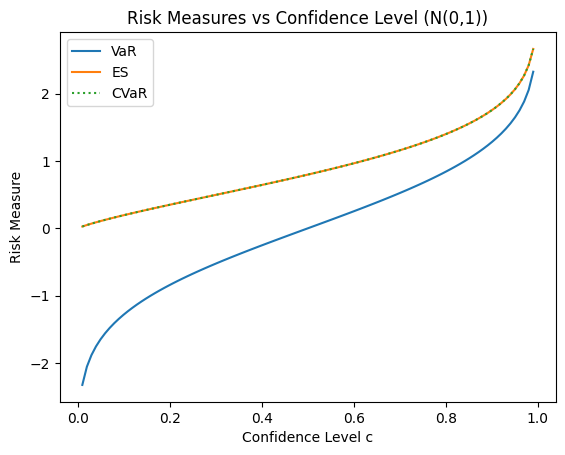

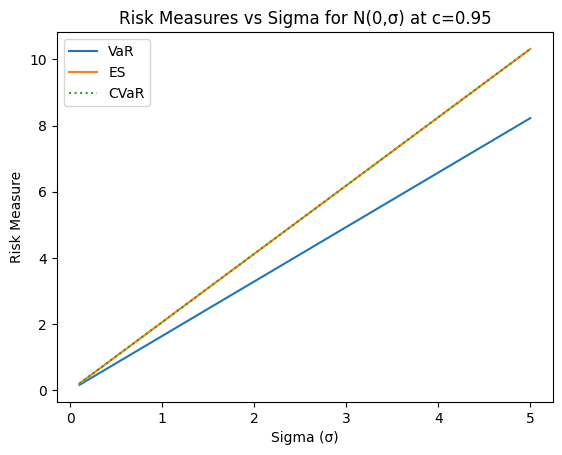

In [27]:
# Plot risk measures against confidence level for N(0,1)
c_values = np.linspace(0.01, 0.99, 100)
var_values = [var(stats.norm.cdf, c) for c in c_values]
es_values = [es(stats.norm.cdf, c) for c in c_values]
cvar_values = [cvar(stats.norm.cdf, c) for c in c_values]

plt.figure()
plt.plot(c_values, var_values, label="VaR")
plt.plot(c_values, es_values, label="ES")
plt.plot(c_values, cvar_values, linestyle = "dotted", label="CVaR")
plt.xlabel("Confidence Level c")
plt.ylabel("Risk Measure")
plt.title("Risk Measures vs Confidence Level (N(0,1))")
plt.legend()
plt.show()

# Plot risk measures against sigma for N(0,sigma) at c=0.95
sigma_values = np.linspace(0.1, 5, 100)
var_values_sigma = [var(lambda x: stats.norm.cdf(x, scale=sigma), 0.95) for sigma in sigma_values]
es_values_sigma = [es(lambda x: stats.norm.cdf(x, scale=sigma), 0.95) for sigma in sigma_values]
cvar_values_sigma = [cvar(lambda x: stats.norm.cdf(x, scale=sigma), 0.95) for sigma in sigma_values]

plt.figure()
plt.plot(sigma_values, var_values_sigma, label="VaR")
plt.plot(sigma_values, es_values_sigma, label="ES")
plt.plot(sigma_values, cvar_values_sigma, linestyle = "dotted", label="CVaR")
plt.xlabel("Sigma (σ)")
plt.ylabel("Risk Measure")
plt.title("Risk Measures vs Sigma for N(0,σ) at c=0.95")
plt.legend()
plt.show()


In the first plot (VaR) increases as confidence level c increases.
This is expected since higher confidence levels correspond to larger quantiles in a standard normal distribution.
ES and CVaR are above VaR, which is correct, and they have a similar increasing trend but are consistently higher than VaR.

In the second plot, all the risk measures increase linearly with $\sigma$, with is consistent with the formulas for this case.